## Reminders

### Conditional Probability

$$
p(x \mid y) = \frac{p(x, y)}{p(y)}
$$

### Bayes' Rule

$
\begin{align}
p(x \mid y) &= \frac{p(y \mid x)p(x)}{p(y)} \\
            &= \frac{p(y \mid x)p(x)}{\int_x p(y \mid x)p(x)}
\end{align}
$

Posterior, likelihood and prior:

$
Posterior = \frac{Likelihood \cdot Prior}{Normalizer}
$

### Frequentist Perspective on Probability
If we were to repeat the same experiment many times, in the limit, the frequency of the event would approach the given probability.

### Bayesian Perspective on Probability
Probability is a reasonable guess based on our degree of belief about the environment.

### Independence
$$
\text{x and y are independent} \iff p(x, y) = kf(x)g(y)
$$

### Conditional Independence

$$
X \ci Y \mid Z
$$

denotes that random variables $X$ and $Y$ are independent provided that we know the state of $Z$.

$$
X \ci Y \mid Z \iff p(X, Y \mid Z) = p(X \mid Z)p(Y \mid Z)
$$

1. If $Z = \varnothing$, then $X$ and $Y$ are (unconditionally) independent.
2. It may be the case that $X$ and $Y$ are not independent, but $X$ and $Y$ are conditionally independent given $Z$.

See https://www.eecs.qmul.ac.uk/~norman/BBNs/Independence_and_conditional_independence.htm for examples on conditional independence.

## Examples

### Probability Tables Example

In [22]:
# Country probabilities
cnt = np.array([0.88, 0.08, 0.04])
# Mother tongue given country probabilities
mt_given_cnt = np.array([[.95, .7, .6],
                         [.04, .3, .0],
                         [.01, .0, .4]])

In [18]:
# Matrix containing the joint probabilities at its each entry
# This is not a matrix product
cnt_and_mt = mt_given_cnt*cnt
cnt_and_mt

array([[ 0.836 ,  0.056 ,  0.024 ],
       [ 0.0352,  0.024 ,  0.    ],
       [ 0.0088,  0.    ,  0.016 ]])

In [20]:
# Sum over the mother tongues to get country probabilities
np.sum(cnt_and_mt, axis=0)

array([ 0.88,  0.08,  0.04])

In [21]:
# Sum over the countries to get mother tongue probabilities
np.sum(cnt_and_mt, axis=1)

array([ 0.916 ,  0.0592,  0.0248])

### Example 1.3 (Obtaining the Desired Conditional Probability Using Marginalizations)
$
\begin{align}
p(B \mid K) &= \sum_m p(B, m \mid K) & \quad\quad \text{Marginalize over b} \\
            &= \sum_m \frac{p(B, m, K)}{p(K)} & \quad\quad \text{Conditional to joint} \\
            &= \frac{\sum_m p(B, m, K)}{p(K)} & \quad\quad \text{Sum to nominator} \\
            &= \frac{\sum_m p(B, m, K)}{\sum_b \sum_m p(K \mid b, m)p(b, m)} & \quad\quad \text{Marginalize over m and b} \\
            &= \frac{\sum_m p(B, m, K)}{\sum_b \sum_m p(K \mid b, m)p(b)p(m)} & \quad\quad \text{m and b are independent} \\
            &= \frac{\sum_m p(B, m, K)}{\sum_b p(b) \sum_m p(K \mid b, m)p(m)} & \quad\quad \text{p(b) to outer sum} \\
            &= \frac{\sum_m p(K \mid B, m)p(B, m)}{\sum_b p(b) \sum_m p(K \mid b, m)p(m)} & \quad\quad \text{Joint to conditional} \\
            &= \frac{\sum_m p(K \mid B, m)p(B)p(m)}{\sum_b p(b) \sum_m p(K \mid b, m)p(m)} & \quad\quad \text{m and b are independent} \\
            &= \frac{p(B) \sum_m p(K \mid B, m)p(m)}{\sum_b p(b) \sum_m p(K \mid b, m)p(m)} & \quad\quad \text{p(b) to outer sum} \\
\end{align}
$

### Exercise 1.11 (Soft XOR Gate)

In [1]:
import numpy as np

def soft_xor(a, b):
    """
    Stochastically outputs 1 depending on a and b.
    """
    high_prob = np.array([0.1, 0.99, 0.8, 0.25])
    rand_num = np.random.ranf()
    if a == 0 and b == 0:
        threshold_index = 0
    elif a == 0 and b == 1:
        threshold_index = 1
    elif a == 1 and b == 0:
        threshold_index = 2
    elif a == 1 and b == 1:
        threshold_index = 3
    
    if rand_num <= high_prob[threshold_index]:
        return 1
    return 0

In [38]:
num_tries = 10000
sum(soft_xor(0, 1) for _ in range(num_tries))/num_tries

0.9895

### Exercise 1.12 (Hamburgers)

In [53]:
p_kj = 1/100000
p_h_given_kj = 0.9

### 1.
p_h = 0.5
p_kj_given_h = (p_h_given_kj*p_kj)/p_h
print('Question 1')
print('p(KJ|Hamburger Eater) = {:f}'.format(p_kj_given_h))
print()

### 2.
p_h = 0.001
p_kj_given_h = (p_h_given_kj*p_kj)/p_h
print('Question 2')
print('p(KJ|Hamburger Eater) = {:f}'.format(p_kj_given_h))

Question 1
p(KJ|Hamburger Eater) = 0.000018

Question 2
p(KJ|Hamburger Eater) = 0.009000


### Exercise 1.13 (Two Dice)

In [2]:
# Prior
p_sa = np.full(6, 1/6)
p_sb = np.full(6, 1/6)
prior = np.outer(p_sa, p_sb)
print('Prior = P(sa, sb) = P(sa)P(sb)')
print(prior)
print()

# Likelihood
indices_1d = np.reshape(np.arange(36), (6, 6))
dice_sums = (indices_1d//6 + 1) + (indices_1d%6 + 1)
likelihood = (dice_sums == 9).astype(int)
print('Likelihood = P(t = 9 | sa, sb)')
print(likelihood)
print()

# Normalizer
joint = prior*likelihood
print('Joint = P(t = 9, sa, sb) = Likelihood*Prior')
print(joint)
print()
normalizer = np.sum(joint)

# Posterior
posterior = likelihood*prior/normalizer  # joint/normalizer
print('Posterior = P(sa, sb | t = 9)')
print(posterior)

Prior = P(sa, sb) = P(sa)P(sb)
[[ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]
 [ 0.02777778  0.02777778  0.02777778  0.02777778  0.02777778  0.02777778]]

Likelihood = P(t = 9 | sa, sb)
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]]

Joint = P(t = 9, sa, sb) = Likelihood*Prior
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.02777778]
 [ 0.          0.          0.          0.          0.02777778  0.        ]
 [ 0.          0.          0.          0.02777778 

### Exercise 1.19.2

$T : \text{Random variable representing the weather today}$

$Y : \text{Random variable representing the weather yesterday}$

Then, we can draw the table for $P(T \mid Y)$.

|   P(T $|$ Y)    | Y = Rainy | Y = Sunny |
| --------------- | --------- | --------- |
| T = Rainy       |     0.7   |     0.6   |
| T = Sunny       |     0.3   |     0.4   |

This conditional probability table corresponds to the following Markov Chain.

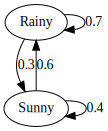

In [72]:
from utils.graph_utils import digraph_from_numpy_array

# state transition matrix
T = np.array([[0.7, 0.3],
              [0.6, 0.4]])
digraph_from_numpy_array(T, labels=['Rainy', 'Sunny'], edge_fmt='{:.1f}')

To answer the second part of the question, we need the steady state transition matrix of this Markov Chain which can be found by multiplying the initial transition matrix with itself sufficiently many times.

T^2


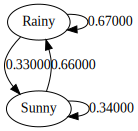

T^3


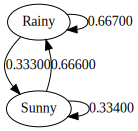

T^4


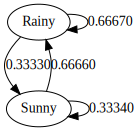

T^5


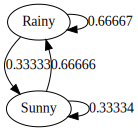

T^6


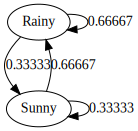

In [21]:
T_s = T
for i in range(5):
    T_s = T_s@T
    print('T^{}'.format(i + 2))
    display(digraph_from_numpy_array(T_s, labels=['Rainy', 'Sunny'], edge_fmt='{:.5f}'))
    print('='*20)